## Random Forest

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pickle

In [44]:
# Training data
train_data = pd.read_csv(r"C:\Users\yooho\Downloads\bodyPart.csv")
train_df = pd.DataFrame(train_data)

# Testing fata
test_data = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial.csv")
test_df = pd.DataFrame(test_data)

In [45]:
# Encode the 'material' column
label_encoder = LabelEncoder()
train_df['material_encoded'] = label_encoder.fit_transform(train_df['material'])

# Encode the 'materials' column for test data
test_df['material_encoded'] = label_encoder.transform(test_df['materials'])

# Standardizing the numerical columns
features = ['area', 'volume','normalized_joints']
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])  # Use the same scaler for the test data

In [46]:
# 2. Train a Random Forest classifier on the training data
X_train = train_df[features]
y_train = train_df['material_encoded']

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
# Test the classifier on the testing data
X_test = test_df[features]
y_test = test_df['material_encoded']
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 40.13%


In [23]:
test_df['predicted_materials'] = label_encoder.inverse_transform(clf.predict(test_df[features]))
print(classification_report(test_df['materials'], test_df['predicted_materials']))
print("Accuracy:", accuracy_score(test_df['materials'], test_df['predicted_materials']))

# If you only want to make predictions without evaluating the model:
predictions = label_encoder.inverse_transform(clf.predict(test_df[features]))
test_df['predicted_materials'] = predictions
print(test_df)

                     precision    recall  f1-score   support

     Metal_Aluminum       0.00      0.00      0.00       170
      Metal_Ferrous       0.09      0.11      0.10       104
Metal_Ferrous_Steel       0.31      0.62      0.41       572
  Metal_Non-Ferrous       0.00      0.00      0.00       215
              Other       0.25      0.36      0.29       347
            Plastic       0.00      0.00      0.00       358
               Wood       0.00      0.00      0.00        83

           accuracy                           0.27      1849
          macro avg       0.09      0.15      0.11      1849
       weighted avg       0.15      0.27      0.19      1849

Accuracy: 0.2650081124932396
      Unnamed: 0             body_name            materials         area  \
0              0                  axil        Metal_Ferrous   122.504972   
1              1                 screw  Metal_Ferrous_Steel     4.416154   
2              2                  deck                 Wood  3354.659

C:\Users\yooho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yooho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yooho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [48]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Separate features and target
X_train = train_df[features]
y_train = train_df['material_encoded']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\yooho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_resampled, y_resampled)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best model
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [50]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = best_rf.predict(test_df[features])

# Evaluate
print(classification_report(test_df['material_encoded'], y_pred))

              precision    recall  f1-score   support

           0       0.66      0.15      0.24       170
           1       0.21      0.14      0.17       104
           2       0.79      0.10      0.18       572
           3       0.13      0.73      0.22       215
           4       0.93      0.16      0.27       347
           5       0.70      0.08      0.15       358
           6       0.16      0.67      0.26        83

    accuracy                           0.21      1849
   macro avg       0.51      0.29      0.21      1849
weighted avg       0.65      0.21      0.20      1849



## KNN

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [5]:
# Training data
train_data = pd.read_csv(r"C:\Users\yooho\Downloads\bodyPart.csv")
train_df = pd.DataFrame(train_data)

# Testing fata
test_data = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial.csv")
test_df = pd.DataFrame(test_data)

# Features and target variable
features = ['area', 'volume','normalized_joints']
target = 'material'

# Scaling
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

# Training
knn = KNeighborsClassifier(n_neighbors=7) # You can change the number of neighbors and experiment
knn.fit(train_df[features], train_df[target])

# Prediction
predictions = knn.predict(test_df[features])

# Evaluation
print(classification_report(test_df['materials'], predictions))

                     precision    recall  f1-score   support

     Metal_Aluminum       0.47      0.50      0.49       170
      Metal_Ferrous       0.54      0.58      0.56       104
Metal_Ferrous_Steel       0.64      0.67      0.66       572
  Metal_Non-Ferrous       0.63      0.55      0.59       215
              Other       0.53      0.55      0.54       347
            Plastic       0.57      0.55      0.56       358
               Wood       0.41      0.37      0.39        83

           accuracy                           0.58      1849
          macro avg       0.54      0.54      0.54      1849
       weighted avg       0.58      0.58      0.57      1849



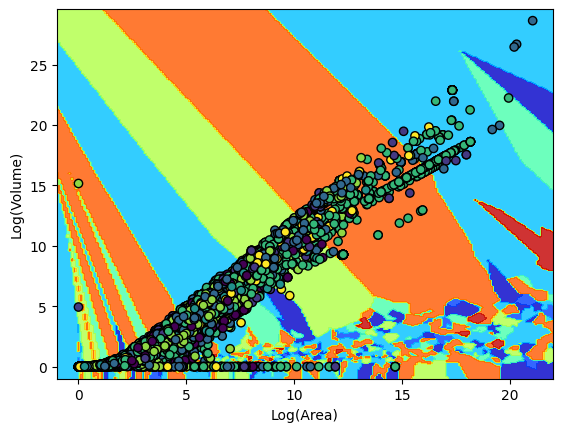

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Train the KNN model
X = train_data[['area', 'volume']].values
y = train_data['material'].values

# Use a label encoder to transform classes into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y_encoded)

# Create a mesh of points
X_log = np.log1p(X)  # adds 1 before taking logarithm to avoid log(0)
x_min, x_max = X_log[:, 0].min() - 1, X_log[:, 0].max() + 1
y_min, y_max = X_log[:, 1].min() - 1, X_log[:, 1].max() + 1

step_size = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))

# Predict the class for each mesh point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.jet)
plt.scatter(X_log[:, 0], X_log[:, 1], c=y_encoded, edgecolors='k', marker='o')
plt.xlabel('Log(Area)')
plt.ylabel('Log(Volume)')
plt.show()

## Correlation

In [5]:
data_cor = pd.read_csv(r"C:\Users\yooho\Downloads\bodyPart.csv")

ValueError: could not convert string to float: 'Guage glass'

In [8]:
# Training data
train_data = pd.read_csv(r"C:\Users\yooho\Downloads\bodyPart.csv")
train_df = pd.DataFrame(train_data)

# Testing fata
test_data = pd.read_csv(r"C:\Users\yooho\Downloads\body_wMaterial.csv")
test_df = pd.DataFrame(test_data)

# Features and target variable
features = ['area', 'volume','normalized_joints']
target = 'material'

# Scaling
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

# Encode the 'material' column
label_encoder = LabelEncoder()
train_df['material_encoded'] = label_encoder.fit_transform(train_df['material'])

# Encode the 'materials' column for test data
test_df['material_encoded'] = label_encoder.transform(test_df['materials'])

# Standardizing the numerical columns
features = ['area', 'volume','normalized_joints']
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])  # Use the same scaler for the test data

In [13]:
print(train_df)

       Unnamed: 0                    name      area    volume  \
0               0             Guage glass -0.059895 -0.012674   
1               1             Upper Frame -0.059888 -0.012674   
2               2                Receiver -0.059885 -0.012674   
3               3              SilverDing -0.059896 -0.012674   
4               4          SilverDing (1) -0.059896 -0.012674   
...           ...                     ...       ...       ...   
11197       11197           main pipe (1) -0.059859 -0.012674   
11198       11198  frame handle shape (1) -0.059876 -0.012674   
11199       11199             caster fork -0.059868 -0.012674   
11200       11200            back metal 1 -0.059889 -0.012674   
11201       11201          main frame (2) -0.059895 -0.012674   

       normalized_joints             material  material_encoded  
0              -0.085639  Metal_Ferrous_Steel                 2  
1              -0.085639    Metal_Non-Ferrous                 3  
2              -0.085

In [22]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

#print(corr_matrix)

corr_matrix["material_encoded"].sort_values(ascending=False)

material_encoded     1.000000
area                 0.002000
normalized_joints   -0.007748
volume              -0.008538
Unnamed: 0          -0.094307
Name: material_encoded, dtype: float64